In [ ]:
!git clone https://github.com/grichali/Arabic-Quotes

Cloning into 'Arabic-Quotes'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 56.03 KiB | 18.68 MiB/s, done.


In [ ]:
import pandas as pd
import re


# Spécifiez le chemin correct
data = pd.read_csv("/content/Arabic-Quotes/datasetv2.csv")
print(data.head())




data.shape

                                               quote   tags
0  لن تستطيع أن تمنع طيور الهم أن تحلق فوق رأسك ،...  أمثال
1                                اكتم سرك تملك امرك.  أمثال
2                          كثرة الكلام تحجب المعنى .  أمثال
3                         الورود الجميلة لها أشواك .  أمثال
4                      لا تفحص أسنان الحصان الهدية .  أمثال


(1250, 2)

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.6 MB/s eta 0:00:00


In [ ]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import pandas as pd
import nlpaug.augmenter.word as naw
import nltk
import random

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


# Initialiser les augmentations
synonym_aug = naw.SynonymAug(aug_src='wordnet')

def random_insertion(text):
    words = text.split()
    if len(words) < 2:
        return text
    index = random.randint(0, len(words) - 1)
    word = words[index]
    words.insert(index, word)
    return ' '.join(words)

def random_swap(text):
    words = text.split()
    if len(words) < 2:
        return text
    idx1, idx2 = random.sample(range(len(words)), 2)
    words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def random_deletion(text):
    words = text.split()
    if len(words) < 2:
        return text
    idx = random.randint(0, len(words) - 1)
    del words[idx]
    return ' '.join(words)

augmented_quotes = []
augmented_tags = []

# Appliquer les augmentations sur chaque citation du dataset
for index, row in data.iterrows():
    quote = row['quote']
    tag = row['tags']

    augmented_quote_1 = synonym_aug.augment(quote)
    augmented_quote_2 = random_insertion(quote)
    augmented_quote_3 = random_swap(quote)
    augmented_quote_4 = random_deletion(quote)

    augmented_quotes.extend([augmented_quote_1, augmented_quote_2, augmented_quote_3, augmented_quote_4])
    augmented_tags.extend([tag] * 4)

# Créer un DataFrame pour les citations augmentées
augmented_data = pd.DataFrame({
    'quote': augmented_quotes,
    'tags': augmented_tags
})

# Ajouter les données augmentées au dataset original
data = pd.concat([data, augmented_data], ignore_index=True)


print("Augmentation terminée et sauvegardée dans '/content/Arabic-Quotes/datasetv2.csv'")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Augmentation terminée et sauvegardée dans '/content/Arabic-Quotes/datasetv2.csv'


In [ ]:
data.shape

(6250, 2)

In [ ]:
# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)
print(data.head())

                                               quote    tags
0  يمكن القول بشكل عام ان الإنسان الاكثر نجاحا ً ...    تميز
1          تكثر أوهامنا حين لا تكون لنا حياة حقيقية.   أمثال
2  إن الثورة ليست بندقية ثائر فحسب، بل هي معول فل...   سياسة
3  الحقائق سهلة عندما يكتشفها المكتشفون ، و لكن ا...   حقيقة
4  المثالية .. هي ان يلاحظ شخص أن رائحة الورد أفض...  تأملات


In [ ]:
def clean_tags(df):
    # Remove square brackets, single quotes, Arabic comma, and strip leading/trailing spaces
    df['tags'] = df['tags'].str.replace("[", "").str.replace("]", "").str.replace("'", "").str.replace("،", "").str.strip()
    # Remove empty tags
    df = df[df['tags'] != '']
    df['tags'] = df['tags'].apply(lambda x: x.split(',')[0].strip())
    df['tags'] = df['tags'].str.replace("[", "").str.replace("]", "").str.replace("'", "").str.replace("،", "").str.strip()
    return df

# Appliquer la fonction
data = clean_tags(data)


In [ ]:
data.head()

,quote,tags
0,يمكن القول بشكل عام ان الإنسان الاكثر نجاحا ً ...,تميز
1,تكثر أوهامنا حين لا تكون لنا حياة حقيقية.,أمثال
2,إن الثورة ليست بندقية ثائر فحسب، بل هي معول فل...,سياسة
3,الحقائق سهلة عندما يكتشفها المكتشفون ، و لكن ا...,حقيقة
4,المثالية .. هي ان يلاحظ شخص أن رائحة الورد أفض...,تأملات


In [ ]:
data['quote']

0       يمكن القول بشكل عام ان الإنسان الاكثر نجاحا ً ...
1               تكثر أوهامنا حين لا تكون لنا حياة حقيقية.
2       إن الثورة ليست بندقية ثائر فحسب، بل هي معول فل...
3       الحقائق سهلة عندما يكتشفها المكتشفون ، و لكن ا...
4       المثالية .. هي ان يلاحظ شخص أن رائحة الورد أفض...
                              ...                        
6245    يستجيب الاتباع طواعية لاوامرك أوامرك اذا عمهم ...
6246                            الامـل علاقة له بالمنطق .
6247    ان النفس تطلب وبقائها قبل ان تطلب لذائذها وشهو...
6248    البكاء لا بأس به في طريقه أثناء استمراره. ولكن...
6249    [كتب تقول: فعلت هذا بسبب. تقول الحياة: فعلت هذ...
Name: quote, Length: 6250, dtype: object

In [ ]:
# Check the data type of the 'quote' column
print(data['quote'].dtype)


object


In [ ]:
data['quote'] = data['quote'].astype(str)


In [ ]:
import nltk
nltk.download('punkt')

import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assurez-vous que les stop words en arabe sont téléchargés
nltk.download('stopwords')
arabic_stop_words = set(stopwords.words('arabic'))

# Fonction de nettoyage
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Retirer les ponctuations
    text = ' '.join([word for word in text.split() if word not in arabic_stop_words])  # Retirer les stop words
    return text

# Nettoyage des données
data['cleaned_quote'] = data['quote'].apply(clean_text)

# Afficher les tokens et les citations nettoyées
print("Citations nettoyées : ", data['cleaned_quote'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Citations nettoyées :  0       يمكن القول بشكل عام ان الإنسان الاكثر نجاحا ال...
1                           تكثر أوهامنا تكون حياة حقيقية
2       الثورة بندقية ثائر فحسب معول فلاح ومشرط طبيب و...
3       الحقائق سهلة عندما يكتشفها المكتشفون المهم ان ...
4       المثالية ان يلاحظ شخص رائحة الورد أفضل الطماطم...
                              ...                        
6245    يستجيب الاتباع طواعية لاوامرك أوامرك اذا عمهم ...
6246                                 الامـل علاقة بالمنطق
6247       ان النفس تطلب وبقائها ان تطلب لذائذها وشهواتها
6248    البكاء بأس طريقه أثناء استمراره تتوقف عاجلا آج...
6249    كتب تقول فعلت بسبب تقول الحياة فعلت الكتب المك...
Name: cleaned_quote, Length: 6250, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,quote,tags,cleaned_quote
0,يمكن القول بشكل عام ان الإنسان الاكثر نجاحا ً ...,تميز,يمكن القول بشكل عام ان الإنسان الاكثر نجاحا ال...
1,تكثر أوهامنا حين لا تكون لنا حياة حقيقية.,أمثال,تكثر أوهامنا تكون حياة حقيقية
2,إن الثورة ليست بندقية ثائر فحسب، بل هي معول فل...,سياسة,الثورة بندقية ثائر فحسب معول فلاح ومشرط طبيب و...
3,الحقائق سهلة عندما يكتشفها المكتشفون ، و لكن ا...,حقيقة,الحقائق سهلة عندما يكتشفها المكتشفون المهم ان ...
4,المثالية .. هي ان يلاحظ شخص أن رائحة الورد أفض...,تأملات,المثالية ان يلاحظ شخص رائحة الورد أفضل الطماطم...


In [ ]:
data['quote'][0]

'يمكن القول بشكل عام ان الإنسان الاكثر نجاحا ً في الحياة تتوفر من هو لديه أفضل و أحسـن المعلومات .'

In [ ]:
data['cleaned_quote'][0]

'يمكن القول بشكل عام ان الإنسان الاكثر نجاحا الحياة تتوفر لديه أفضل أحسـن المعلومات'

In [ ]:
from sklearn.model_selection import train_test_split

# Division des données en ensemble d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_quote'], data['tags'], test_size=0.2, random_state=42)

print("Taille de X_train :", len(X_train))
print("Taille de X_test :", len(X_test))

Taille de X_train : 5000
Taille de X_test : 1250


In [ ]:
X_train

1203    احرارا ديمقراطيتـنا اسم فما معنى ان ننتخب كـل ...
1740                           أفضل الأعمال لاف هوى النفس
142            تحصل اغلب تريد الناس العاديين طريق تنظيمهم
2228                   نصرة الحق شرف شرف ونصرة الباطل سرف
3922                    اكثر الناس كذبا اكثرهم حديثا نفسه
                              ...                        
3772    الاهتمام فكرا وعملا يقتضي قراءة التاريخ أولا ل...
5191                       القيادة يمكن تعلمها يجب تعلمها
5226                     النصر عادة الهزيمة الهزيمة للأسف
5390               الطفل الطفل يتعود الضرب يبكي اذا لمسته
860                       الأمة تتفوق المعرفة تتفوق القوة
Name: cleaned_quote, Length: 5000, dtype: object

In [ ]:
y_train

1203    سياسة
1740     دروس
142     قيادة
2228     حرية
3922    أمثال
        ...  
3772    سياسة
5191    قيادة
5226      حرب
5390    أمثال
860       علم
Name: tags, Length: 5000, dtype: object

In [ ]:
X_test

5026    المبدأ فان القيادة السيطرة اعداد كبيرة الاتباع...
611     الأحمق يعيش ليأكل العاقل يأكل ليعيش المؤمن يعي...
5564              يكون الانسان الانسان حرا عندما يود يكون
4288    العرب دول ممزقة أمة والأوروبيون أمم أمم مشتتة ...
4608    الرحمة القانون جوهر يستخدم القانون بقسوة الا ا...
                              ...                        
1672                   اجعل عينيك النجوم اجعل قدميك الارض
1535                     تاريخ العالم سيرة الرجال العظماء
564                   يتقن فن العيش نفسه يعرف البؤس البؤس
478                                    يعرف يجب يصعب يكذب
5638    علاج العجب انت خفت عملك العجب فانظر رضا تطلب و...
Name: cleaned_quote, Length: 1250, dtype: object

In [ ]:
y_test

5026    قيادة
611      حياة
5564     حرية
4288    سياسة
4608    تنمية
        ...  
1672     طموح
1535    تاريخ
564     سعادة
478       علم
5638     دروس
Name: tags, Length: 1250, dtype: object


 **SVM**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Step 2: Target Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Step 3: Model Training
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train_encoded)

# Example of predicting
y_pred_encoded = model.predict(X_train_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_train_encoded, y_pred_encoded)
print(f'Accuracy: {accuracy}')
print(classification_report(y_train_encoded, y_pred_encoded))


Accuracy: 0.9854
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       176
           1       1.00      1.00      1.00       202
           2       0.98      1.00      0.99       204
           3       1.00      1.00      1.00       208
           4       1.00      1.00      1.00       192
           5       1.00      1.00      1.00       202
           6       1.00      1.00      1.00       203
           7       1.00      1.00      1.00       207
           8       1.00      1.00      1.00       201
           9       0.97      0.99      0.98       194
          10       1.00      0.96      0.98       211
          11       1.00      0.99      0.99       203
          12       1.00      0.98      0.99       192
          13       0.98      0.96      0.97       210
          14       0.80      1.00      0.89       200
          15       0.99      0.94      0.97       198
          16       0.99      1.00      0.99       200
          

**TEST**

In [ ]:
# Step 1: Text Vectorization for test set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Target Encoding for test set
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Predict on test set
y_pred_test_encoded = model.predict(X_test_tfidf)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test_encoded, y_pred_test_encoded))


Test Accuracy: 0.9792
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        74
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        42
           4       1.00      0.98      0.99        58
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        43
           8       1.00      1.00      1.00        49
           9       0.93      1.00      0.97        56
          10       1.00      0.95      0.97        39
          11       0.98      0.96      0.97        47
          12       1.00      0.95      0.97        58
          13       0.97      0.90      0.94        40
          14       0.77      1.00      0.87        50
          15       1.00      1.00      1.00        52
          16       0.96      1.00      0.98        50
     

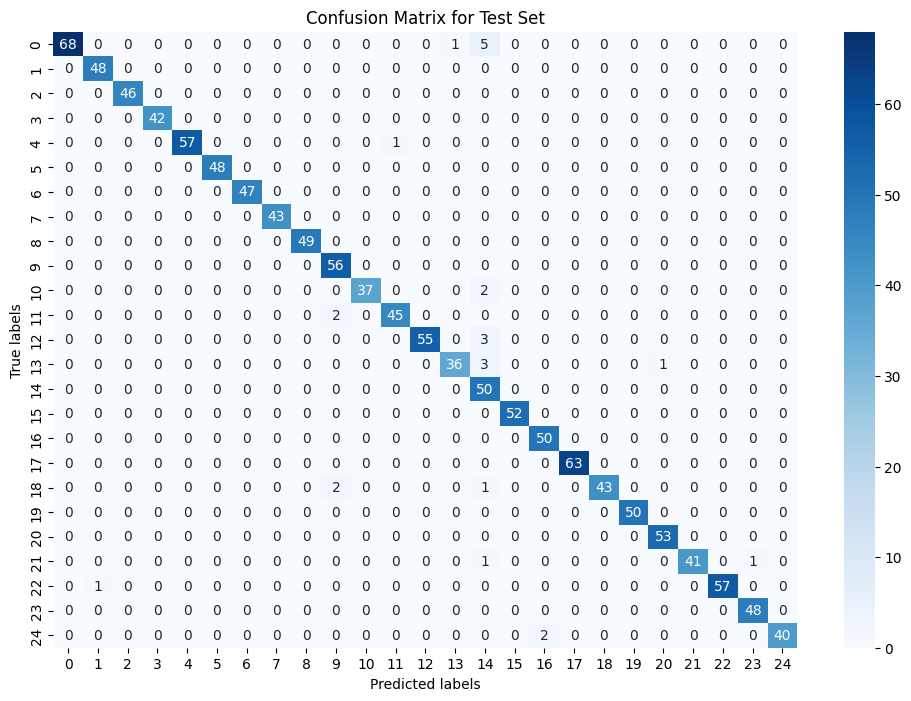

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for test set
conf_matrix = confusion_matrix(y_test_encoded, y_pred_test_encoded)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()


**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-Validation
cross_val_scores = cross_val_score(model, tfidf_vectorizer.transform(X_train), y_train_encoded, cv=5, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Accuracy: {cross_val_scores.mean()}')


Cross-Validation Accuracy Scores: [0.953 0.952 0.965 0.953 0.962]
Mean Cross-Validation Accuracy: 0.9569999999999999


In [ ]:
# Test the model with new quotes

# Function to predict the tag for a given quote
def predict_tag(quote):
    # Clean the quote
    cleaned_quote = clean_text(quote)
    # Vectorize the cleaned quote
    quote_tfidf = tfidf_vectorizer.transform([cleaned_quote])
    # Predict the tag
    predicted_tag_encoded = model.predict(quote_tfidf)
    # Decode the predicted tag
    predicted_tag = label_encoder.inverse_transform(predicted_tag_encoded)
    return predicted_tag[0]

# List of new quotes to test
test_quotes = [
    "حكم عظيمة تعلمنا في حياتنا",  # Example quote 1
    "لا تستسلم أبداً مهما كان الأمر صعباً",  # Example quote 2
    "العلم نور والجهل ظلام",  # Example quote 3
]

# Print the predictions for the test quotes
for quote in test_quotes:
    predicted_tag = predict_tag(quote)
    print(f"Quote: {quote}\nPredicted Tag: {predicted_tag}\n")


Quote: حكم عظيمة تعلمنا في حياتنا
Predicted Tag: حياة

Quote: لا تستسلم أبداً مهما كان الأمر صعباً
Predicted Tag: إلهام

Quote: العلم نور والجهل ظلام
Predicted Tag: علم



**Random Forest**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Step 2: Target Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Step 3: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train_encoded)

# Example of predicting
y_pred_encoded = model.predict(X_train_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_train_encoded, y_pred_encoded)
print(f'Accuracy: {accuracy}')
print(classification_report(y_train_encoded, y_pred_encoded))


Accuracy: 0.9884
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       176
           1       1.00      1.00      1.00       202
           2       0.98      1.00      0.99       204
           3       1.00      1.00      1.00       208
           4       1.00      1.00      1.00       192
           5       1.00      1.00      1.00       202
           6       1.00      1.00      1.00       203
           7       1.00      1.00      1.00       207
           8       1.00      1.00      1.00       201
           9       0.98      0.99      0.99       194
          10       1.00      0.96      0.98       211
          11       1.00      0.99      0.99       203
          12       1.00      0.98      0.99       192
          13       1.00      0.96      0.98       210
          14       1.00      0.96      0.98       200
          15       0.81      1.00      0.90       198
          16       1.00      0.99      1.00       200
          

**test**

In [ ]:
# Step 1: Text Vectorization for test set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Target Encoding for test set (already fitted on training set)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Predict on test set
y_pred_test_encoded = model.predict(X_test_tfidf)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test_encoded, y_pred_test_encoded))


Test Accuracy: 0.9752
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        74
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        46
           3       1.00      0.98      0.99        42
           4       1.00      1.00      1.00        58
           5       1.00      1.00      1.00        48
           6       0.98      1.00      0.99        47
           7       1.00      1.00      1.00        43
           8       0.98      0.98      0.98        49
           9       0.95      1.00      0.97        56
          10       1.00      0.95      0.97        39
          11       1.00      0.96      0.98        47
          12       0.98      0.95      0.96        58
          13       1.00      0.90      0.95        40
          14       1.00      0.94      0.97        50
          15       0.72      0.96      0.83        52
          16       0.98      0.98      0.98        50
     

** Confusion Matrix **

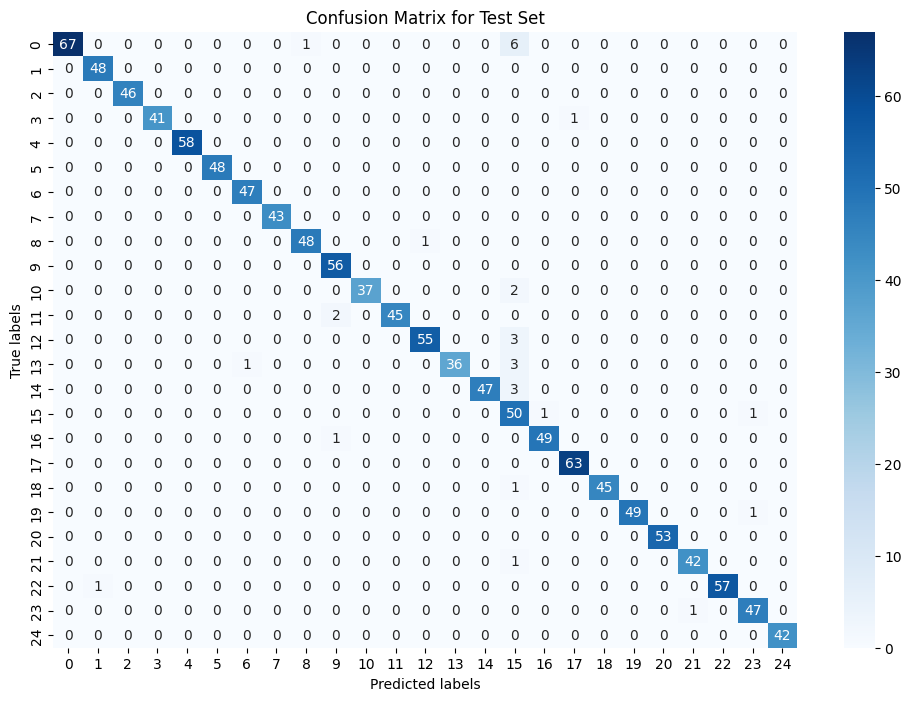

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for test set
conf_matrix = confusion_matrix(y_test_encoded, y_pred_test_encoded)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()


**Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-Validation
cross_val_scores = cross_val_score(model, tfidf_vectorizer.transform(X_train), y_train_encoded, cv=5, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Accuracy: {cross_val_scores.mean()}')


Cross-Validation Accuracy Scores: [0.956 0.969 0.972 0.962 0.965]
Mean Cross-Validation Accuracy: 0.9648


** test de modèle**

In [ ]:
# Function to predict the tag for a given quote
def predict_tag(quote):
    # Clean the quote (you need to define your own clean_text function)
    cleaned_quote = clean_text(quote)
    # Vectorize the cleaned quote
    quote_tfidf = tfidf_vectorizer.transform([cleaned_quote])
    # Predict the tag
    predicted_tag_encoded = model.predict(quote_tfidf)
    # Decode the predicted tag
    predicted_tag = label_encoder.inverse_transform(predicted_tag_encoded)
    return predicted_tag[0]

# List of new quotes to test
test_quotes = [
    "حكم عظيمة تعلمنا في حياتنا",  # Example quote 1
    "لا تستسلم أبداً مهما كان الأمر صعباً",  # Example quote 2
    "العلم نور والجهل ظلام",  # Example quote 3
]

# Print the predictions for the test quotes
for quote in test_quotes:
    predicted_tag = predict_tag(quote)
    print(f"Quote: {quote}\nPredicted Tag: {predicted_tag}\n")


Quote: حكم عظيمة تعلمنا في حياتنا
Predicted Tag: حياة

Quote: لا تستسلم أبداً مهما كان الأمر صعباً
Predicted Tag: حياة

Quote: العلم نور والجهل ظلام
Predicted Tag: علم



** naive_bayes **

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Step 2: Target Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Step 3: Model Training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train_encoded)

# Example of predicting
y_pred_encoded = model.predict(X_train_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_train_encoded, y_pred_encoded)
print(f'Accuracy: {accuracy}')
print(classification_report(y_train_encoded, y_pred_encoded))


Accuracy: 0.9598
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       176
           1       0.96      1.00      0.98       202
           2       0.96      0.98      0.97       204
           3       0.97      0.97      0.97       208
           4       0.97      0.99      0.98       192
           5       1.00      0.96      0.98       202
           6       0.99      0.98      0.98       203
           7       0.94      0.99      0.96       207
           8       0.97      1.00      0.98       201
           9       0.98      0.93      0.95       194
          10       0.81      1.00      0.89       211
          11       0.96      0.99      0.97       203
          12       0.98      0.93      0.96       192
          13       0.97      0.94      0.96       210
          14       0.94      0.91      0.92       200
          15       0.98      0.86      0.92       198
          16       0.98      0.98      0.98       200
          

**test**

In [ ]:
# Step 1: Text Vectorization for test set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Target Encoding for test set (already fitted on training set)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Predict on test set
y_pred_test_encoded = model.predict(X_test_tfidf)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test_encoded, y_pred_test_encoded))


Test Accuracy: 0.9096
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        74
           1       0.96      0.98      0.97        48
           2       0.90      0.98      0.94        46
           3       0.93      0.90      0.92        42
           4       0.96      0.95      0.96        58
           5       1.00      0.94      0.97        48
           6       0.94      0.96      0.95        47
           7       0.89      0.91      0.90        43
           8       0.92      1.00      0.96        49
           9       0.96      0.80      0.87        56
          10       0.70      1.00      0.82        39
          11       0.87      0.96      0.91        47
          12       0.96      0.88      0.92        58
          13       0.87      0.85      0.86        40
          14       0.79      0.84      0.82        50
          15       0.95      0.81      0.88        52
          16       0.92      0.94      0.93        50
     

**matrice de confusion **

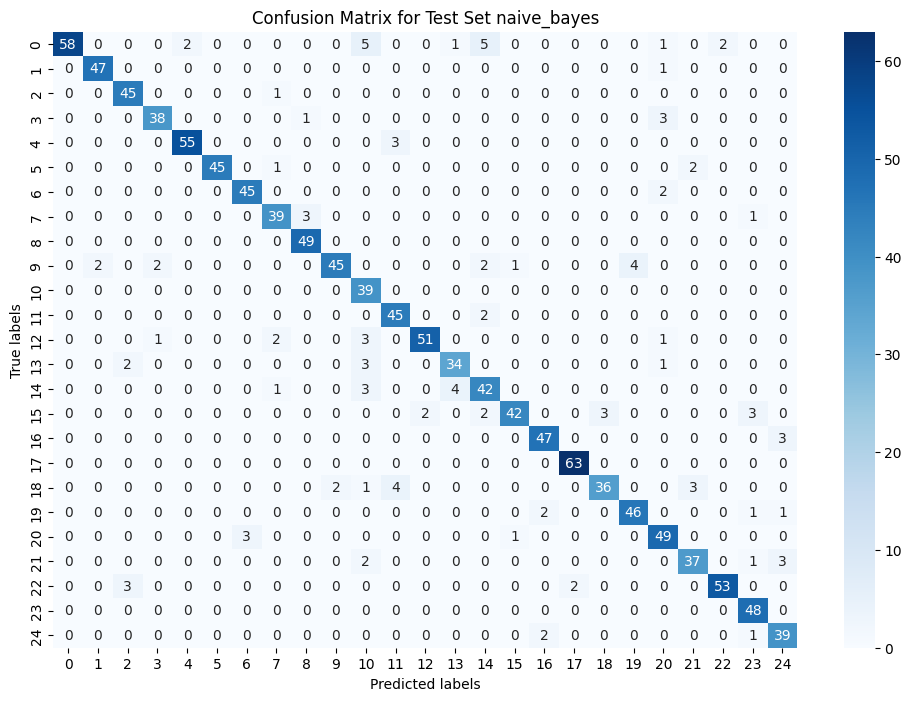

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for test set
conf_matrix = confusion_matrix(y_test_encoded, y_pred_test_encoded)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set naive_bayes')
plt.show()


**Comparaison**

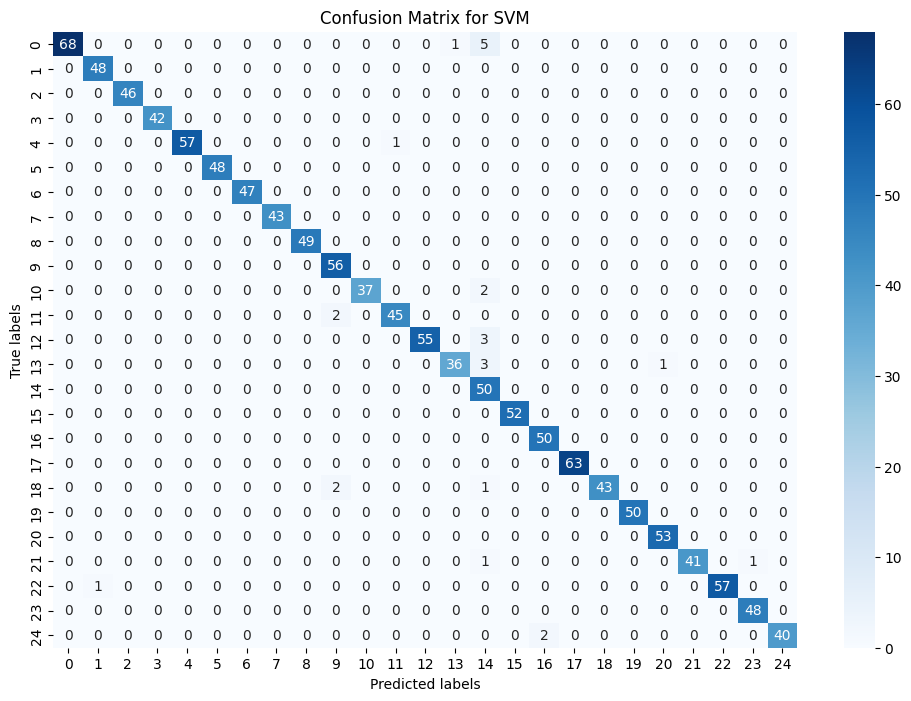

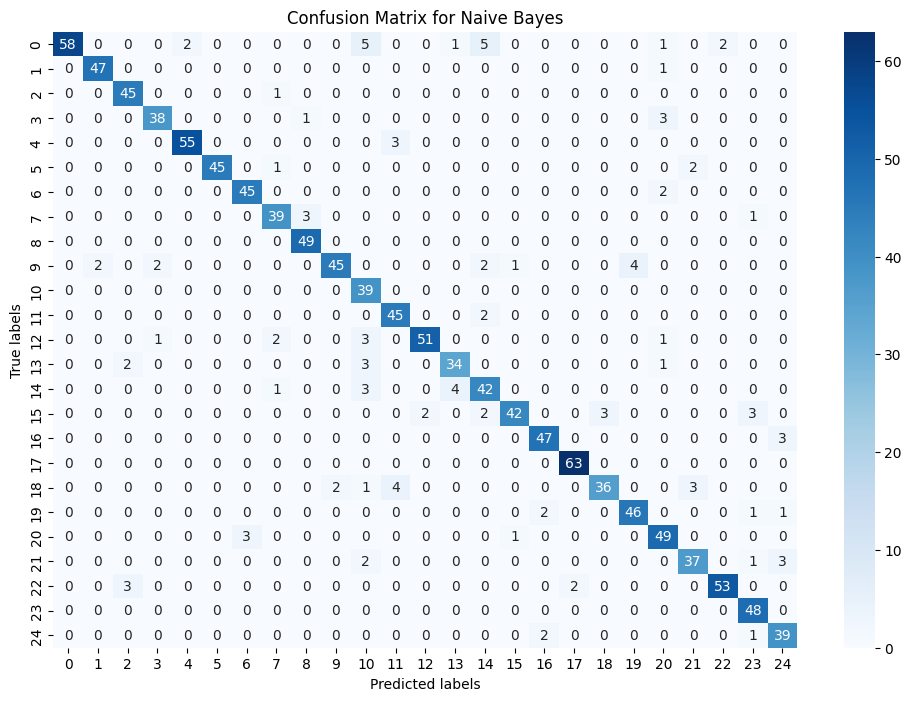

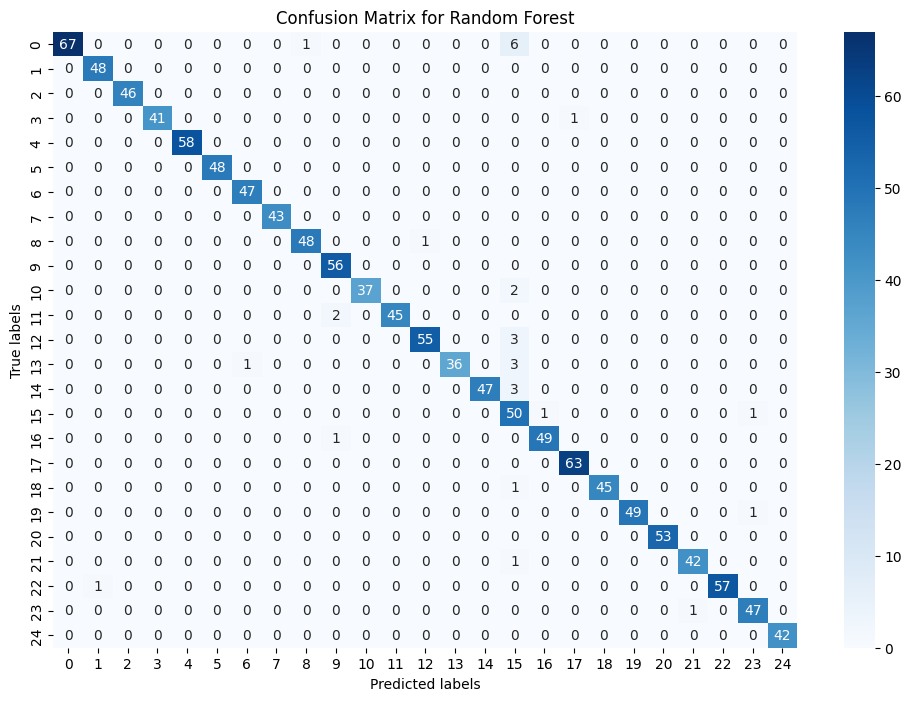

           Model  Accuracy  Precision    Recall  F1-Score
0            SVM    0.9792   0.982240  0.979181  0.979756
1    Naive Bayes    0.9096   0.909739  0.912166  0.907847
2  Random Forest    0.9752   0.979783  0.975764  0.976755


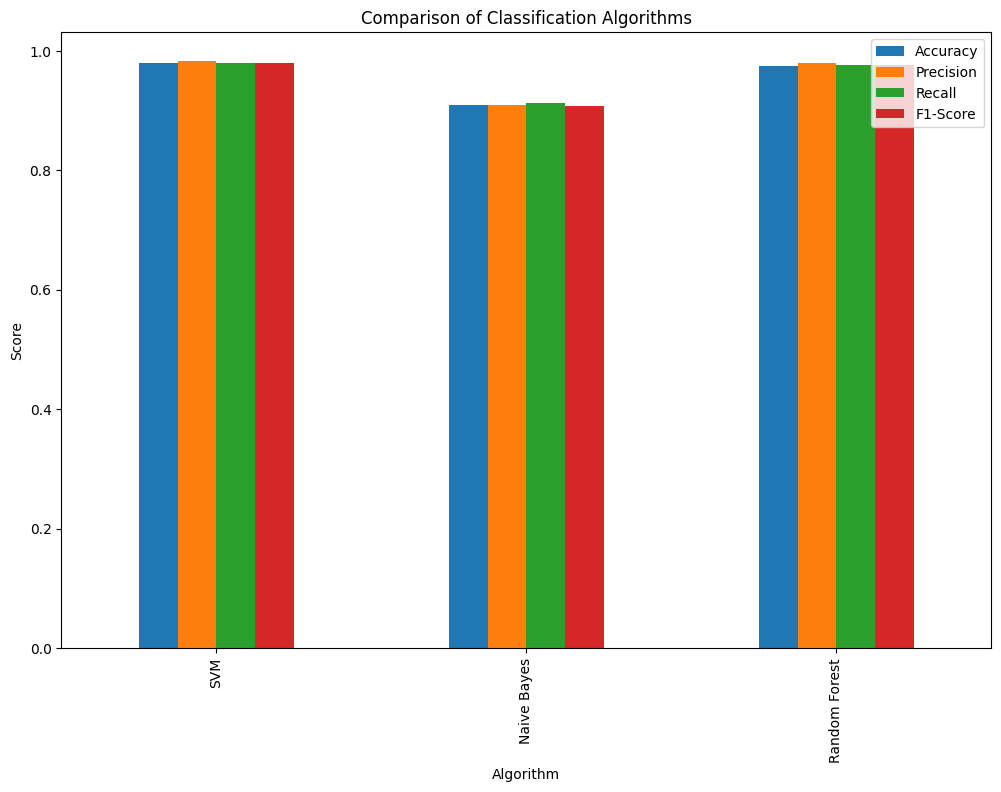

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Target Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define models
models = {
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Initialize results dictionary
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train, predict and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train_encoded)

    # Predict on test set
    y_pred_test_encoded = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)

    # Get classification report
    class_report = classification_report(y_test_encoded, y_pred_test_encoded, output_dict=True)

    # Extract precision, recall, and f1-score for the macro average
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']

    # Append results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1_score)

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred_test_encoded)
    plt.figure(figsize=(12, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Plot the comparison
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Algorithms')
plt.ylabel('Score')
plt.xlabel('Algorithm')
plt.show()


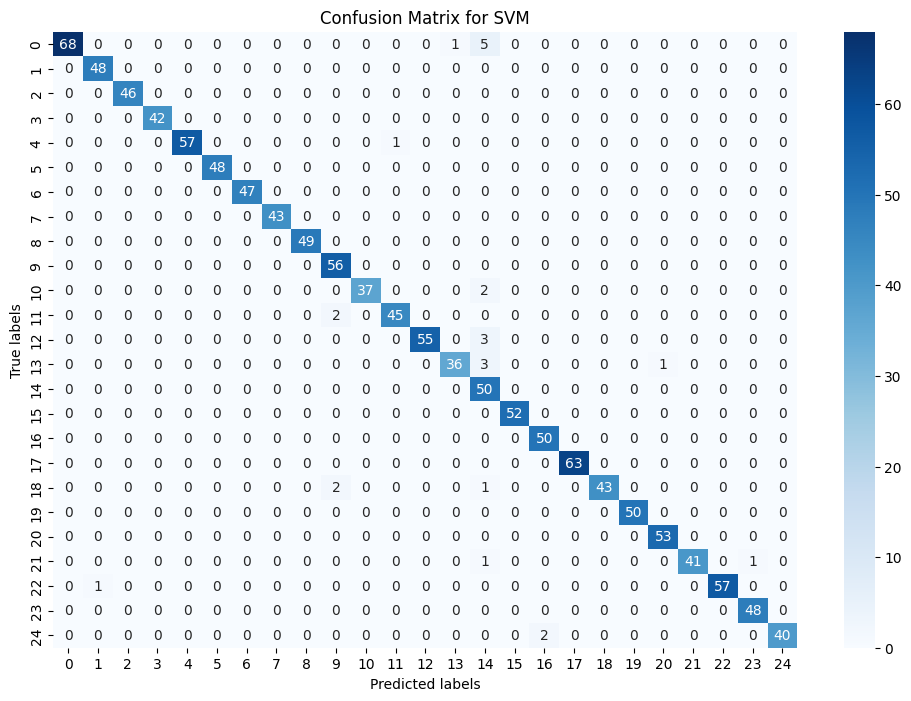

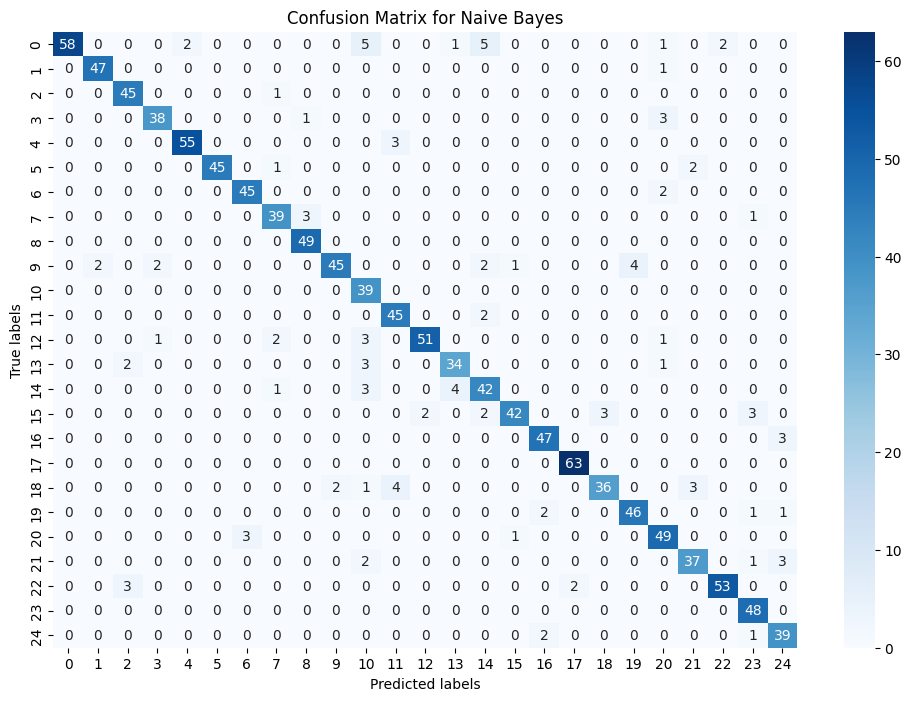

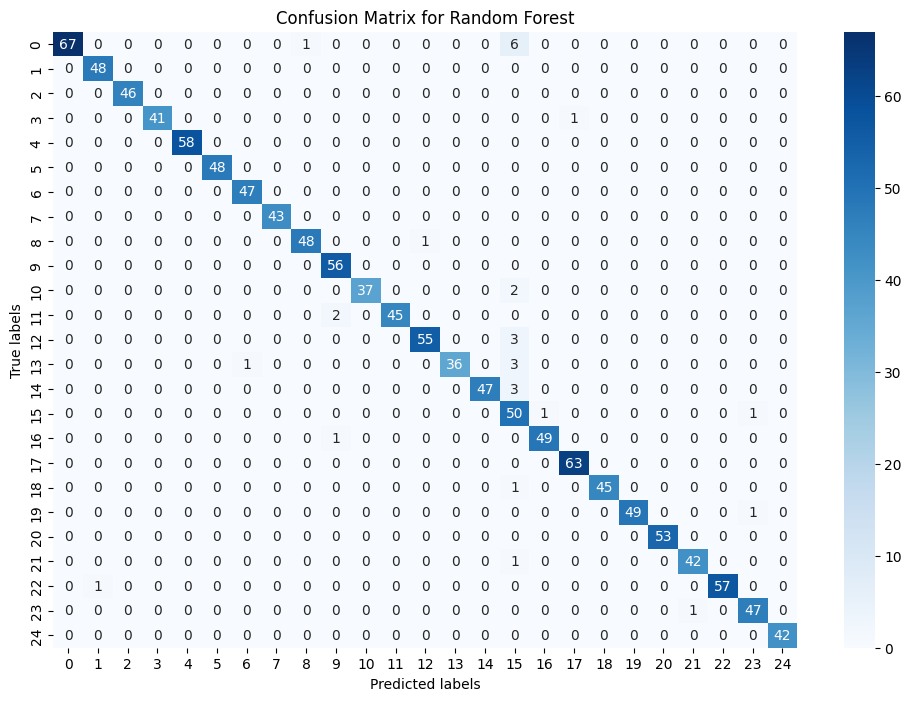

           Model  Accuracy  Precision    Recall  F1-Score
0            SVM    0.9792   0.982240  0.979181  0.979756
1    Naive Bayes    0.9096   0.909739  0.912166  0.907847
2  Random Forest    0.9752   0.979783  0.975764  0.976755


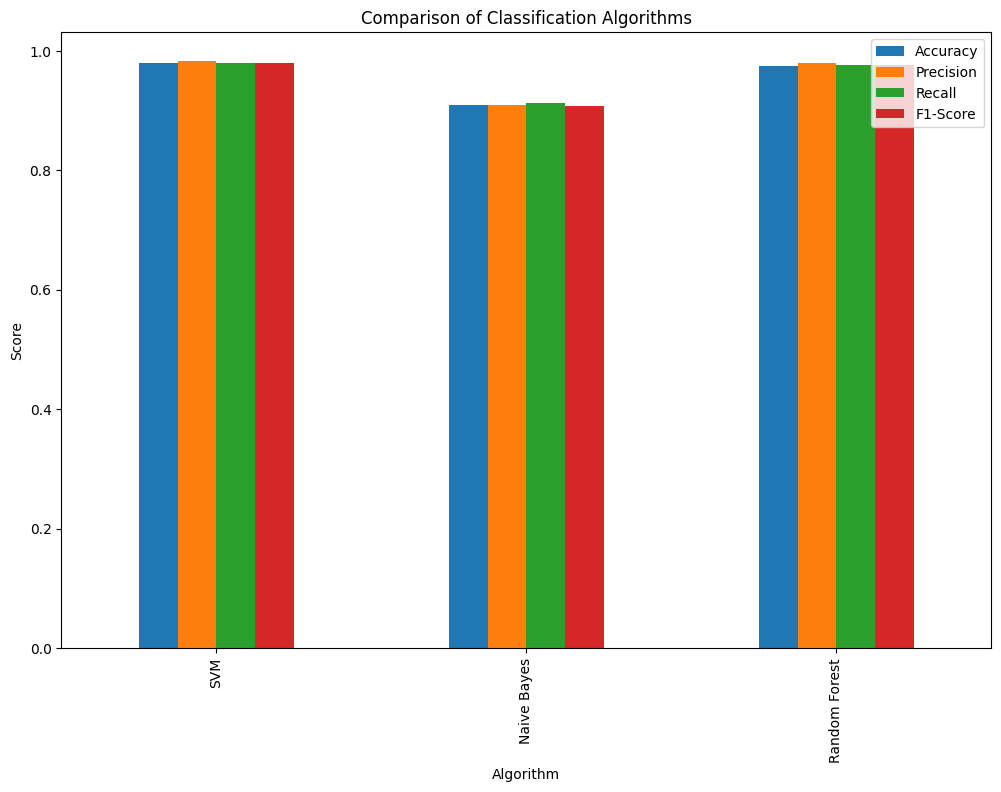

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Target Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define models
models = {
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Initialize results dictionary
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train, predict and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train_encoded)

    # Predict on test set
    y_pred_test_encoded = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred_test_encoded)

    # Get classification report
    class_report = classification_report(y_test_encoded, y_pred_test_encoded, output_dict=True)

    # Extract precision, recall, and f1-score for the macro average
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']
    f1_score = class_report['macro avg']['f1-score']

    # Append results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1_score)

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred_test_encoded)
    plt.figure(figsize=(12, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Plot the comparison
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Algorithms')
plt.ylabel('Score')
plt.xlabel('Algorithm')
plt.show()


In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/manalbakar22/Nlp-repo.git


In [19]:
!cp /content/drive/MyDrive/Colab Notebooks/SVCVersion.ipynb /content/nlp-prj


cp: cannot stat '/content/drive/MyDrive/Colab': No such file or directory
cp: cannot stat 'Notebooks/SVCVersion.ipynb': No such file or directory


In [14]:
from getpass import getpass
token = getpass('gJ ')
!git clone https://{token}@github.com/manalbakar22/Nlp-repo.git


KeyboardInterrupt: Interrupted by user